In [1]:
import tweepy # twitter's Python API
import pandas as pd
import json
import matplotlib.pyplot as plt
import csv

In [2]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''


In [211]:
def get_api(screen_name,count):
    '''
        Downloaing all of the tweets from a wellknown bots
        for last 7 days
    '''
    # defining twitter developer access
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)

    api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

    tweets = []
    latest_tweets = api.user_timeline(screen_name = screen_name, count = count)
    tweets.extend(latest_tweets)
    return tweets

In [163]:
def store_tweets(tweets,file_name='data/tweets.json'):
    
    features = ['created_at', 'id', 'text',  'source','in_reply_to_status_id',  'geo', 
             'retweet_count', 'favorite_count', 'favorited', 'lang']
    sub_tags = ['entities', 'user', 'place']
    
    entities_tag = ['hashtags', 'urls']
    
    user_tag = ['id', 'name', 'screen_name', 'location', 'url','protected', 'followers_count', 'friends_count',
                'created_at', 'geo_enabled', 'verified', 'lang']
    
    place_tag = ['id', 'place_type', 'name', 'country_code']

    
    # a list of all formatted tweets
    tweet_list=[]

    for tweet in tweets:

        # a dict to contain information about single tweet
        tweet_information=dict()
        
        for feat in features:
            if (feat == 'created_at'):
                tweet_information['created_at']=tweet.created_at.strftime("%Y-%m-%d %H:%M:%S")
            else:
                tweet_information[feat]=tweet._json[feat]
        for s_tag in sub_tags:
            if (s_tag == 'entities'):
                for s_t in entities_tag:
                    tweet_information[s_t]=tweet._json['entities'][s_t]
                
            elif (s_tag == 'user'):
                for s_t in user_tag:
                    tweet_information[s_t]=tweet._json['user'][s_t]
            
            elif (s_tag == 'place'):
                for s_t in place_tag:
                    if (tweet._json['place']!= None):
                        tweet_information[s_t]=tweet._json['place'][s_t] 
                    else:
                        tweet_information[s_t]= None
    

        # add this tweet to the tweet_list
        tweet_list.append(tweet_information)
    #Save dictionary into json file
    with open(file_name,"w") as fd:
        json.dump( tweet_list, fd)

    # close the file_des
    fd.close()
    return tweet_list

In [131]:
def fetch_tweets(screen_names, count):

    # initialize the list to hold all tweets from all users
    alltweets=[]

    # get all tweets for each screen name
    for  screen_name in screen_names:
        alltweets.extend(get_api(screen_name,count=count))

    return alltweets


In [204]:
count = 100
screen_names = ['@_grammar_','@attention_cnn','@NYT4thDownBot','@oliviataters','@DearAssistant','@a_quilt_bot',
                '@reverseocr', '@accidental575','@JustToSayBot','@FavThingsBot','@portmanteau_bot','@BloombrgNewsish',
                '@AwlTags',
                '@TinyCareBot','@simpscreens','@censusAmericans',' @everycolorbot','@pentametron','@AutoCharts',
                '@big_ben_clock', ' @everycolorbot','@RealHumanPraise','@wayback_exe'
               ] #,,'@pixelsorter'

tweets = fetch_tweets(screen_names,count)

In [205]:
# Saving to json file
tweet_list = store_tweets(tweets,file_name='data/tweets.json')


In [206]:
#reading json files including tweets dictionaries
with open('data/tweets.json', "r") as fd:
    tweets1 = json.load(fd)



In [207]:
len(tweets1)

2287

---

In [208]:
df = pd.DataFrame(tweets1)
df.to_csv('data/bot.csv')

In [209]:
df.head()

,country_code,created_at,favorite_count,favorited,followers_count,friends_count,geo,geo_enabled,hashtags,id,...,name,place_type,protected,retweet_count,screen_name,source,text,url,urls,verified
0,AQ,Mon Jun 25 16:06:39 +0000 2012,2,False,45802,2,"{'type': 'Point', 'coordinates': [-89.09786011...",True,[],4d25f30d2fbf1463,...,Antarctica,country,False,0,_grammar_,"<a href=""https://twitter.com/Your_Grammar"" rel...","I declare this message by you, @sprintcare, un...",http://t.co/y2OxdNwM0Y,"[{'url': 'https://t.co/YN2ntm6tBp', 'expanded_...",False
1,None,Mon Jun 25 16:06:39 +0000 2012,0,False,45802,2,"{'type': 'Point', 'coordinates': [-57.40262096...",True,[],None,...,None,None,False,0,_grammar_,"<a href=""https://twitter.com/Your_Grammar"" rel...","It was possible for you, @BoxeoMundial, to hav...",http://t.co/y2OxdNwM0Y,[],False
2,None,Mon Jun 25 16:06:39 +0000 2012,4,False,45802,2,"{'type': 'Point', 'coordinates': [-59.7565709,...",True,[],None,...,None,None,False,0,_grammar_,"<a href=""https://twitter.com/Your_Grammar"" rel...",I insist that it would have been better if you...,http://t.co/y2OxdNwM0Y,"[{'url': 'https://t.co/I4TBAoxzw3', 'expanded_...",False
3,None,Mon Jun 25 16:06:39 +0000 2012,1,False,45802,2,"{'type': 'Point', 'coordinates': [57.07041009,...",True,[],None,...,None,None,False,0,_grammar_,"<a href=""https://twitter.com/Your_Grammar"" rel...",I discovered @Bmac0507 ought to type “Marvel [...,http://t.co/y2OxdNwM0Y,[],False
4,None,Mon Jun 25 16:06:39 +0000 2012,6,False,45802,2,"{'type': 'Point', 'coordinates': [27.58900536,...",True,[],None,...,None,None,False,0,_grammar_,"<a href=""https://twitter.com/Your_Grammar"" rel...","I consider this update by you, @EwanMacKenna, ...",http://t.co/y2OxdNwM0Y,"[{'url': 'https://t.co/bEN4JKvwsa', 'expanded_...",False


In [186]:
df.describe().columns

Index(['favorite_count', 'followers_count', 'friends_count',
       'in_reply_to_status_id', 'retweet_count'],
      dtype='object')

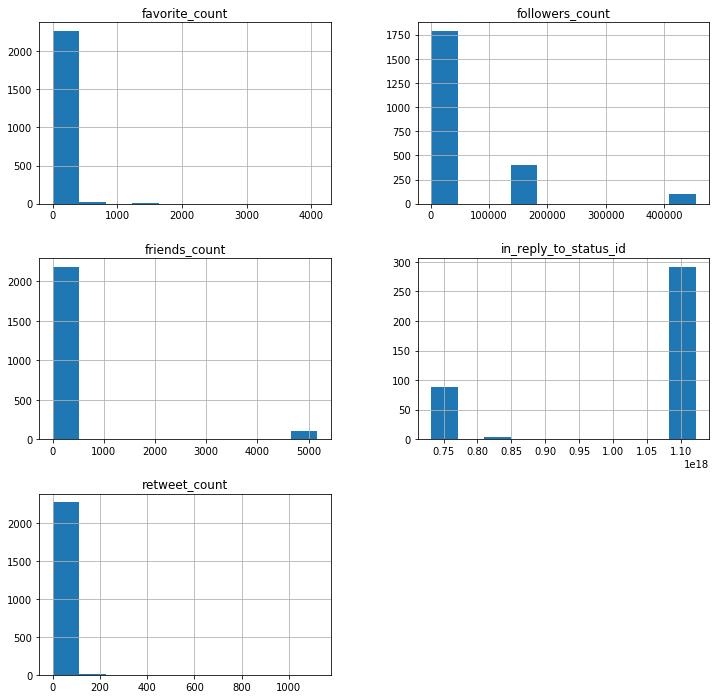

In [194]:
df1 = df[['favorite_count', 'followers_count', 'friends_count',
       'in_reply_to_status_id', 'retweet_count']]
df1.hist(figsize=(12,12));

In [197]:
df_real = pd.read_csv('data/top_100.csv')

In [1]:
# real_tweets = fetch_tweets(df_real.id,count=10)